In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [8]:
#import dataset 
df = pd.read_csv('.././data/csv/16-Adaboost.csv')

## 31.1 Classification Problem Dataset

In [5]:
x1 = list(df['AdaBoost'][3:13])
x1 = [float(s) for s in x1]
x2 = list(df['Unnamed: 1'][3:13])
x2 = [float(s) for s in x2]

['3.64754035',
 '2.612663842',
 '2.363359679',
 '4.932600453',
 '3.776154753',
 '8.673960793',
 '5.861599451',
 '8.984677361',
 '7.467380954',
 '4.436284412']

Text(0,0.5,'x2')

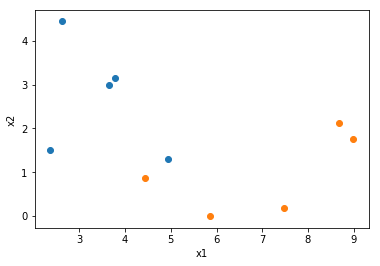

In [68]:
fig = plt.figure()

plt.scatter(x1[:len(x1)//2],x2[:len(x2)//2])
plt.scatter(x1[len(x1)//2:],x2[len(x2)//2:])
plt.xlabel("x1")
plt.ylabel("x2")

## 31.3 Decision Stump: Model #1

In [69]:
weight = list(df['Unnamed: 3'][18:28])
weight = [float(s) for s in weight]

y = list(df['Unnamed: 2'][18:28])
y = [float(s) for s in y]

x1_split = float(df['Unnamed: 4'][18:19])

In [70]:
def judge_gorup(x_split, x_data):
    _group = []
    for i in x_data:
        if i <= x_split:
            _group.append("LEFT")
        else:
            _group.append("RIGHT")
    return _group

In [71]:
group = judge_gorup(x1_split, x1)
print('=====Group=====')
for i in group:
    print(i)
    
prediction = []
print('=====Prediction=====')
for n in group:
    if n == 'LEFT':
        print(0)
        prediction.append(0)
    else:
        print(1)
        prediction.append(1)

=====Group=====
LEFT
LEFT
LEFT
LEFT
LEFT
RIGHT
RIGHT
RIGHT
RIGHT
LEFT
=====Prediction=====
0
0
0
0
0
1
1
1
1
0


In [72]:
error = []

print('=====Error=====')
for i in range(len(prediction)):
    print(abs(int(prediction[i]) - int(y[i])))
    error.append(abs(int(prediction[i]) - int(y[i])))

weight_error = []

print('=====Weight Error=====')
for i in range(len(error)):
    print(int(error[i])*float(weight[i]))
    weight_error.append(int(error[i])*float(weight[i]))

=====Error=====
0
0
0
0
0
0
0
0
0
1
=====Weight Error=====
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.1


In [73]:
import math
print('=====Sum Weights=====')
sum_w = math.ceil(sum(weight))
print(sum_w)

print('=====Sum Errors=====')
sum_e = (sum(weight_error))
print(sum_e)

print('=====Misclassification=====')
misclassification = sum_e/sum_w
print(misclassification)

=====Sum Weights=====
1
=====Sum Errors=====
0.1
=====Misclassification=====
0.1


In [74]:
print('=====Stage=====')
stage = math.log((1-misclassification)/misclassification)
print(stage)
print('=====Accuracy=====')
print((1-sum(error)/len(error))*100)

=====Stage=====
2.1972245773362196
=====Accuracy=====
90.0


## 31.3.1 Update Instance Weights

In [75]:
x2_split = float(df['Unnamed: 4'][32:33])

update_weight = []
print('=====update_weight=====')
for i in range(len(weight)):
    print(weight[i]*(math.exp(weight_error[i]*stage)))
    update_weight.append(weight[i]*(math.exp(weight_error[i]*stage)))

=====update_weight=====
0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.12457309396155175


In [76]:
group2 = judge_gorup(x2_split, x2)
print('=====Group=====')
for i in group2:
    print(i)

prediction2 = []
print('=====Prediction=====')
for n in group2:
    if n == 'RIGHT':
        print(0)
        prediction2.append(0)
    else:
        print(1)
        prediction2.append(1)

=====Group=====
RIGHT
RIGHT
LEFT
LEFT
RIGHT
LEFT
LEFT
LEFT
LEFT
LEFT
=====Prediction=====
0
0
1
1
0
1
1
1
1
1


In [77]:
error2 = []

print('=====Error=====')
for i in range(len(prediction2)):
    print(abs(int(prediction2[i]) - int(y[i])))
    error2.append(abs(int(prediction2[i]) - int(y[i])))

weight_error2 = []

print('=====Weight Error=====')
for i in range(len(error2)):
    print(int(error2[i])*float(update_weight[i]))
    weight_error2.append(int(error2[i])*float(update_weight[i]))

=====Error=====
0
0
1
1
0
0
0
0
0
0
=====Weight Error=====
0.0
0.0
0.1
0.1
0.0
0.0
0.0
0.0
0.0
0.0


In [78]:
print('=====Sum Weights=====')
sum_w2 = sum(update_weight)
print(sum_w2)

print('=====Sum Errors=====')
sum_e2 = (sum(weight_error2))
print(sum_e2)

print('=====Misclassification=====')
misclassification2 = sum_e2/sum_w2
print(misclassification2)

=====Sum Weights=====
1.0245730939615516
=====Sum Errors=====
0.2
=====Misclassification=====
0.1952032521434779


In [79]:
print('=====Stage=====')
stage2 = math.log((1-misclassification2)/misclassification2)
print(stage2)
print('=====Accuracy=====')
print((1-sum(error2)/len(error2))*100)

=====Stage=====
1.4165484239922632
=====Accuracy=====
80.0


## 31.5 Decision Stump: Model #3

In [80]:
x2_split = float(df['Unnamed: 4'][46:47])

update_weight2 = []
print('=====update_weight=====')
for i in range(len(update_weight)):
    print(update_weight[i]*(math.exp(weight_error2[i]*stage2)))
    update_weight2.append(update_weight[i]*(math.exp(weight_error2[i]*stage2)))

=====update_weight=====
0.1
0.1
0.11521788965937903
0.11521788965937903
0.1
0.1
0.1
0.1
0.1
0.12457309396155175


In [81]:
group3 = judge_gorup(x2_split, x2)
print('=====Group=====')
for i in group3:
    print(i)

prediction3 = []
print('=====Prediction=====')
for n in group3:
    if n == 'RIGHT':
        print(0)
        prediction3.append(0)
    else:
        print(1)
        prediction3.append(1)

=====Group=====
RIGHT
RIGHT
RIGHT
RIGHT
RIGHT
RIGHT
LEFT
RIGHT
LEFT
LEFT
=====Prediction=====
0
0
0
0
0
0
1
0
1
1


In [83]:
error3 = []

print('=====Error=====')
for i in range(len(prediction3)):
    print(abs(int(prediction3[i]) - int(y[i])))
    error3.append(abs(int(prediction3[i]) - int(y[i])))

weight_error3 = []

print('=====Weight Error=====')
for i in range(len(error3)):
    print(int(error3[i])*float(update_weight2[i]))
    weight_error3.append(int(error3[i])*float(update_weight2[i]))

=====Error=====
0
0
0
0
0
1
0
1
0
0
=====Weight Error=====
0.0
0.0
0.0
0.0
0.0
0.1
0.0
0.1
0.0
0.0


In [84]:
print('=====Sum Weights=====')
sum_w3 = sum(update_weight2)
print(sum_w3)

print('=====Sum Errors=====')
sum_e3 = (sum(weight_error3))
print(sum_e3)

print('=====Misclassification=====')
misclassification3 = sum_e3/sum_w3
print(misclassification3)

=====Sum Weights=====
1.0550088732803098
=====Sum Errors=====
0.2
=====Misclassification=====
0.18957186528502415


In [85]:
print('=====Stage=====')
stage3 = math.log((1-misclassification3)/misclassification3)
print(stage3)
print('=====Accuracy=====')
print((1-sum(error3)/len(error3))*100)

=====Stage=====
1.4527944804404969
=====Accuracy=====
80.0


## 31.6 Make Predictions with AdaBoost Model

In [89]:
def calc_weighted_stage(prediction, stage):
    model = []
    for i in prediction:
        if i == 1:
            model.append(stage*1)
        else:
            model.append(stage*(-1))
    return model

In [93]:
model1 = calc_weighted_stage(prediction, stage)

print('=========Model1========')
for i in model1:
    print(i)

=========Model1========
-2.1972245773362196
-2.1972245773362196
-2.1972245773362196
-2.1972245773362196
-2.1972245773362196
2.1972245773362196
2.1972245773362196
2.1972245773362196
2.1972245773362196
-2.1972245773362196


In [94]:
model2 = calc_weighted_stage(prediction2, stage2)
print('=========Model2========')
for i in model2:
    print(i)

=========Model2========
-1.4165484239922632
-1.4165484239922632
1.4165484239922632
1.4165484239922632
-1.4165484239922632
1.4165484239922632
1.4165484239922632
1.4165484239922632
1.4165484239922632
1.4165484239922632


In [96]:
model3 = calc_weighted_stage(prediction3, stage3)
print('=========Model3========')
for i in model3:
    print(i)

=========Model3========
-1.4527944804404969
-1.4527944804404969
-1.4527944804404969
-1.4527944804404969
-1.4527944804404969
-1.4527944804404969
1.4527944804404969
-1.4527944804404969
1.4527944804404969
1.4527944804404969


In [101]:
sum_model = []

print('=========SUM========')
for i in range(len(model1)):
    print(model1[i]+model2[i]+model3[i])
    sum_model.append(model1[i]+model2[i]+model3[i])

prediction_model = []
print('=========Prediction========')
for i in sum_model:
    if i > 0:
        print(1)
        prediction_model.append(1)
    else:
        print(0)
        prediction_model.append(0)

=========SUM========
-5.066567481768979
-5.066567481768979
-2.233470633784453
-2.233470633784453
-5.066567481768979
2.160978520887986
5.066567481768979
2.160978520887986
5.066567481768979
0.6721183270965405
=========Prediction========
0
0
0
0
0
1
1
1
1
1


In [110]:
y_model = list(df['Unnamed: 7'][60:70])
y_model = [float(s) for s in y_model]

error_model = []
print('=====Error=====')
for i in range(len(prediction_model)):
    print(abs(int(prediction_model[i]) - int(y_model[i])))
    error_model.append(abs(int(prediction_model[i]) - int(y_model[i])))
    
print('=====Accuracy=====')
print((1-sum(error_model)/len(error_model))*100)

=====Error=====
0
0
0
0
0
0
0
0
0
0
=====Accuracy=====
100.0
